In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Método Runge-Kutta

$\frac{du}{dt} = f(t, u)$

In [24]:
def u(f, tn, un, h = 0.1, tol = 1e-3, changed = False):
    k1 = f(tn, un)
    k2 = f(tn + h/2, un + (h/2)*k1)
    k3 = f(tn + h/2, un + (h/2)*k2)
    k4 = f(tn + h, un + h*k3)
    res = un + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return res, h, changed

# Changed to adaptative method
def evaluate_numeric(f, u0, h = 0.1, start = 0, finish = 2, method = u, tol = 1e-3):
    t = [start]
    ux = [u0]
    i = 1
    hh = h
    changed = True
    while t[-1] < finish:
        t.append(t[-1] + hh)
        res, hh, changed = method(f, t[i],ux[i-1], hh, tol, changed)
        ux.append(res)
        i = i + 1
    return np.vstack((np.transpose(t), np.transpose(ux)))


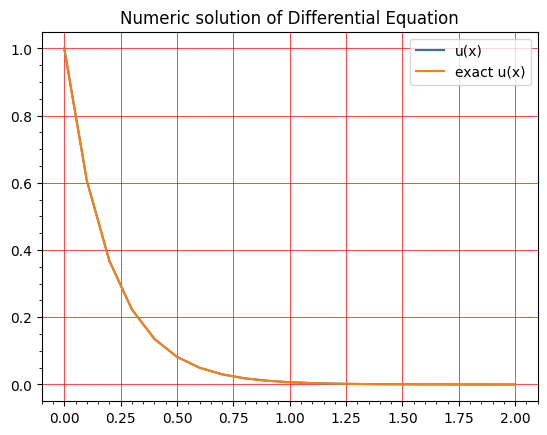

In [25]:
def dfdt(t, u):
    return -5*u

res = evaluate_numeric(dfdt, 1)

t_n = res[0]
u_n = res[1]
exact_u = np.exp(-5* t_n)
erro = np.abs(u_n - exact_u)/exact_u

fig, ax = plt.subplots()

plt.plot(t_n, u_n, label="u(x)")
plt.plot(t_n, exact_u, label="exact u(x)")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()

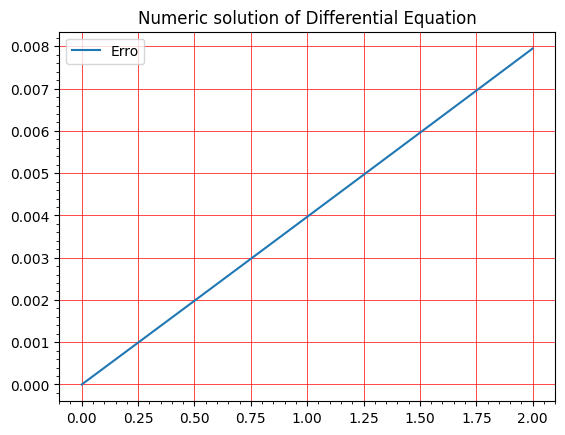

In [26]:
fig, ax = plt.subplots()

plt.plot(t_n, erro, label="Erro")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()

# Runge Kutta matricial:

In [42]:
def dfdt2(t, u):
    u1 = u[0]
    u2 = u[1]
    return np.array([1.2 * u1 - 0.6*u1*u2, 0.8*u2 + 0.3*u1*u2])

res2 = evaluate_numeric(dfdt2, np.array([2,1]), h = 0.001, finish = 20)

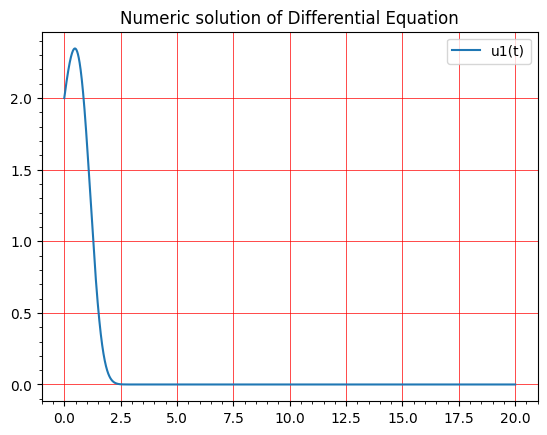

In [43]:
fig, ax = plt.subplots()

t_n = res2[0]
u0 = res2[1]
u1 = res2[2]

plt.plot(t_n, u0, label="u1(t)")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()


In [56]:
MAX_STEP = 0.05

def u_adapt(f, tn, un, h = 0.1, tol = 1e-3, changed = False):
    hh = h
    nchanged = False
    while True:
        k1 = f(tn,           un)
        k2 = f(tn + (1/2)*hh, un + (1/2)*k1)
        k3 = f(tn + (3/4)*hh, un + (3/4)*k2)
        k4 = f(tn + hh,       un + (2/9)*k1 + (3/9)*k2 + (4/9)*k3)
        s1 = un + hh*((2/9)*k1 + (3/9)*k2 + (4/9)*k3)
        s2 = un + hh*((7/24)*k1 + (6/24)*k2 + (8/24)*k3 + (3/24)*k4)
        delta = abs(s2-s1)
        
        if delta > tol:
            hh = hh/2
            nchanged = True
        else:
            if nchanged:
                return s2, hh, nchanged
            else:
                if changed:
                    return s2, hh, nchanged
                else:
                    return s2, min(hh*(tol/delta)**(1/3), MAX_STEP), nchanged
        
def u_adapt_no_increase(f, tn, un, h = 0.1, tol = 1e-3, changed = False):
    hh = h
    while True:
        k1 = f(tn,               un)
        k2 = f(tn + (1/2)*hh, un + (1/2)*k1)
        k3 = f(tn + (3/4)*hh, un + (3/4)*k2)
        k4 = f(tn + hh,       un + (2/9)*k1 + (3/9)*k2 + (4/9)*k3)
        s1 = un + hh*((2/9)*k1 + (3/9)*k2 + (4/9)*k3)
        s2 = un + hh*((7/24)*k1 + (6/24)*k2 + (8/24)*k3 + (3/24)*k4)
        delta = abs(s2-s1)
        if delta > tol:
            new_h = hh/2
        else:
            return s2, hh, changed

def evaluate_numeric_adapt(f, u0, h = 0.1, start = 0, finish = 2, tol = 1e-3):
    return evaluate_numeric(f, u0, h, start, finish, method = u_adapt, tol = tol)

def evaluate_numeric_adapt_no_increase(f, u0, h = 0.1, start = 0, finish = 2, tol = 1e-3):
    return evaluate_numeric(f, u0, h, start, finish, method = u_adapt_no_increase, tol = tol)

In [57]:
def dfdt3(t, u):
    return 10 * math.exp(-(t-2)**2/(2*0.075**2)) - 0.6*u

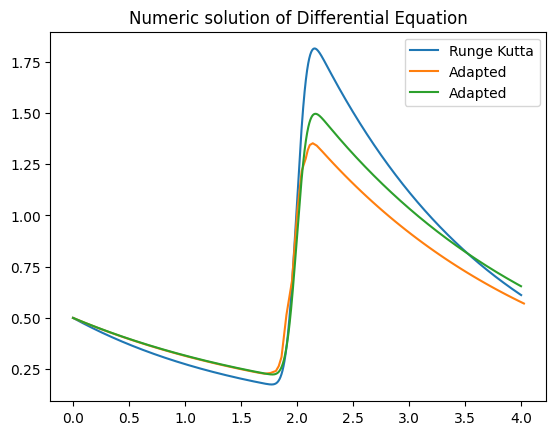

In [58]:
res = evaluate_numeric(dfdt3, 0.5, h=0.001, finish=4)
res_adapt = evaluate_numeric_adapt(dfdt3, 0.5, h=0.001, finish=4, tol=1e-3)
res_adapt_no_increase = evaluate_numeric_adapt_no_increase(dfdt3, 0.5, h=0.0001, finish=4)

plt.plot(res[0], res[1], label="Runge Kutta")
plt.plot(res_adapt[0], res_adapt[1], label="Adapted")
plt.plot(res_adapt_no_increase[0], res_adapt_no_increase[1], label="Adapted")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.title("Numeric solution of Differential Equation")
plt.legend()

ax = plt.gca()